<a href="https://colab.research.google.com/github/hadil56165M/hadil56165M/blob/main/datascience_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse de données avec CRISP-DM sur le dataset Iris**

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classificateurs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Validation croisée et optimisation des hyperparamètres
from sklearn.model_selection import cross_val_score, GridSearchCV

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

# **2. Data Understanding**

In [2]:
# Chargement du dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
y = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Création d'un DataFrame complet
df = pd.concat([X, y], axis=1)

# Exploration des données
print("Dimensions du dataset:", df.shape)
print("\nAperçu des premières lignes:")
df.head()

Dimensions du dataset: (150, 5)

Aperçu des premières lignes:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Informations sur le dataset
print("Informations sur le dataset:")
df.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Statistiques descriptives
print("Statistiques descriptives:")
df.describe()

Statistiques descriptives:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne:")
df.isnull().sum()

Valeurs manquantes par colonne:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [6]:
# Distribution des classes
print("Distribution des classes:")
print(df['species'].value_counts())

Distribution des classes:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# **3. Data Preparation**

In [7]:
# Séparation des features et de la cible
X = df.drop('species', axis=1)
y = df['species']

# Encodage de la variable cible
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensions des ensembles d'entraînement et de test:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensions des ensembles d'entraînement et de test:
X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


# **5. Evaluation**

In [8]:
# Initialisation des modèles
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Calcul de la précision
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Affichage des résultats
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("-" * 50)

# Comparaison des performances des modèles
print("Comparaison des modèles:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Logistic Regression:
  Accuracy: 0.9333
  Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

--------------------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.9333
  Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

--------------------------------------------------
Suppor

# **5. Evaluation**

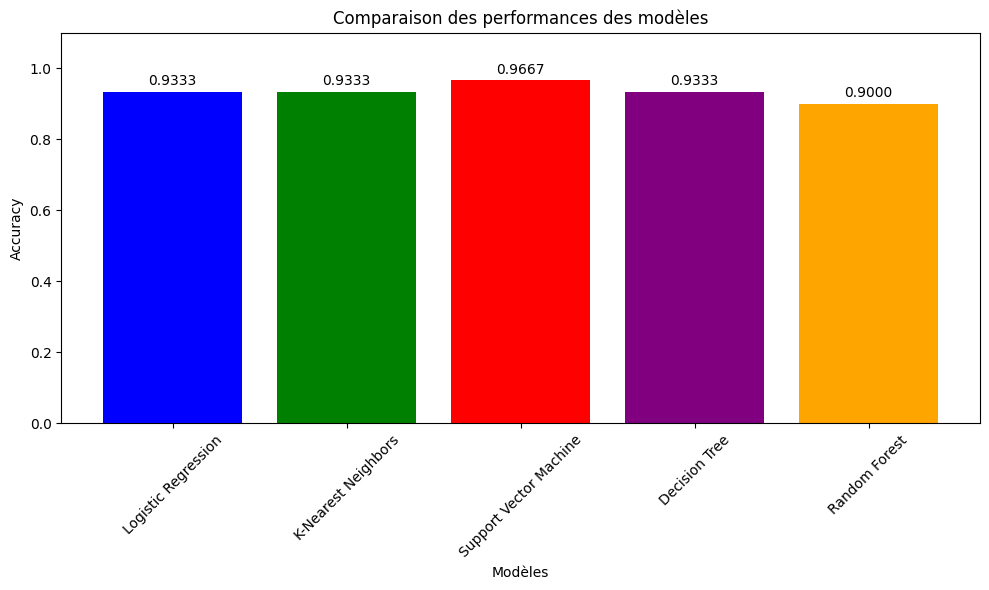

In [9]:
# Visualisation des performances des modèles
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracy_scores = list(results.values())

bars = plt.bar(models_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparaison des performances des modèles')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)

# Ajout des valeurs sur les barres
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

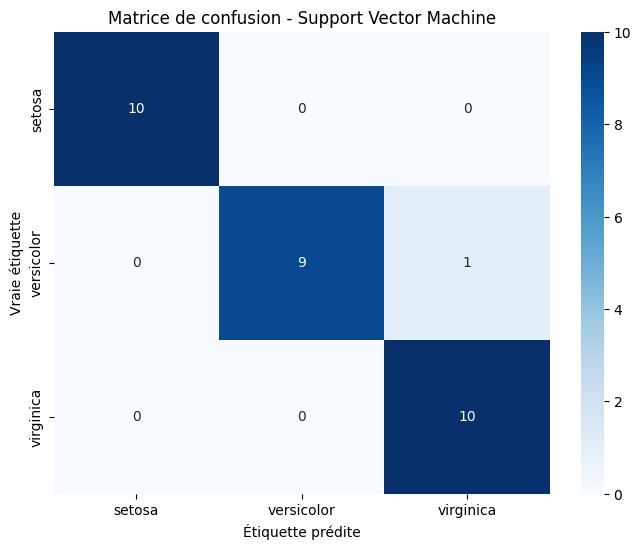

In [10]:
# Matrice de confusion pour le meilleur modèle
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test_scaled)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f'Matrice de confusion - {best_model_name}')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# **6. Deployment (Optimisation du meilleur modèle)**

In [11]:
# Optimisation des hyperparamètres pour le meilleur modèle
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f"Meilleurs paramètres: {grid_search.best_params_}")

elif best_model_name == 'Support Vector Machine':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    grid_search = GridSearchCV(SVC(random_state=42),
                              param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Évaluation du modèle optimisé
y_pred_optimized = best_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f"Performance du modèle {best_model_name} optimisé: {optimized_accuracy:.4f}")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_optimized, target_names=le.classes_))

Meilleurs paramètres: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Performance du modèle Support Vector Machine optimisé: 0.9667
Rapport de classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# **7. Visualisations supplémentaires**

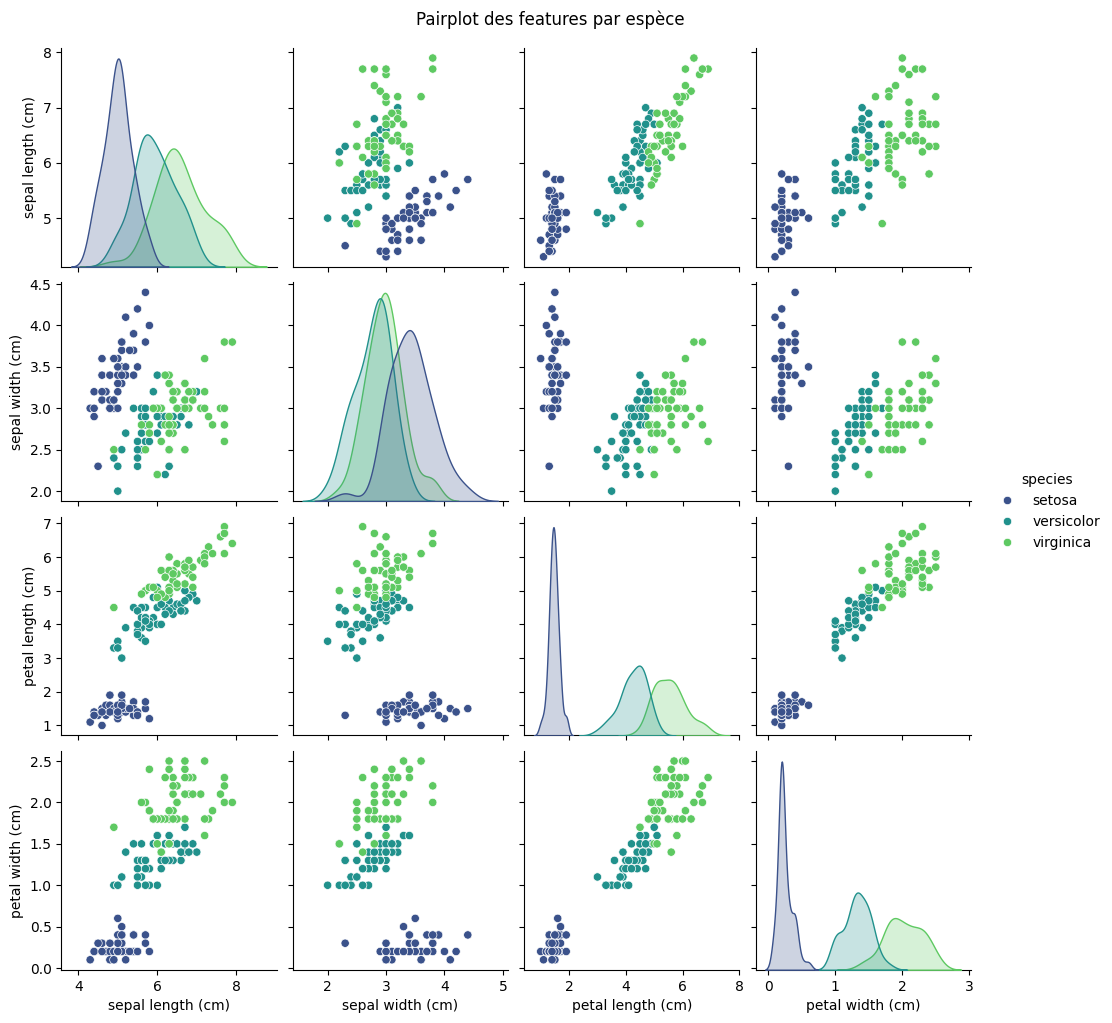

In [12]:
# Visualisation des données avec une pairplot
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot des features par espèce', y=1.02)
plt.show()

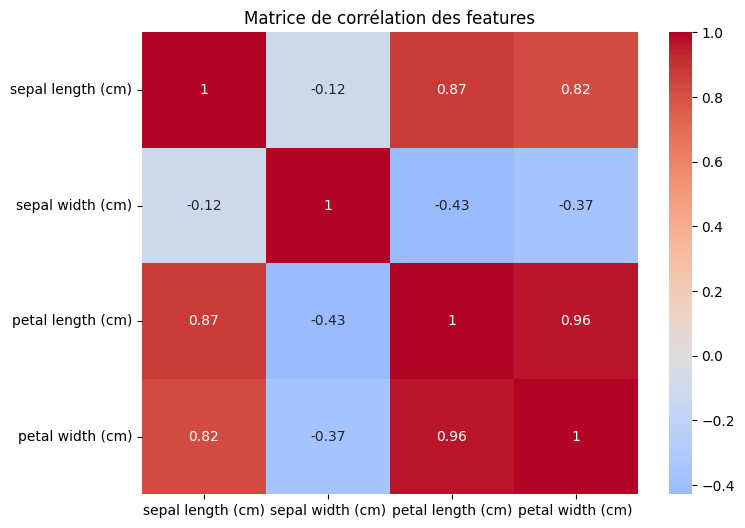

In [13]:
# Matrice de corrélation
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des features')
plt.show()